In [1]:
import pandas as pd

from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter


In [2]:
data_dir_base = "/Users/hn/Documents/01_research_data/RangeLand/Data/"
census_population_dir = data_dir_base + "census/"
# Shannon_data_dir = data_dir_base + "Shannon_Data/"
# USDA_data_dir = data_dir_base + "/NASS_downloads/"
param_dir = data_dir_base + "parameters/"
Min_data_base = data_dir_base + "Min_Data/"
reOrganized_dir = data_dir_base + "reOrganized/"

plots_dir = data_dir_base + "plots/"

In [3]:
SoI = [
    "Alabama",
    "Arizona",
    "Arkansas",
    "California",
    "Colorado",
    "Florida",
    "Georgia",
    "Idaho",
    "Illinois",
    "Iowa",
    "Kansas",
    "Kentucky",
    "Louisiana",
    "Mississippi",
    "Missouri",
    "Montana",
    "Nebraska",
    "Nevada",
    "New Mexico",
    "North Dakota",
    "Oklahoma",
    "Oregon",
    "South Dakota",
    "Tennessee",
    "Texas",
    "Utah",
    "Virginia",
    "Washington",
    "Wyoming",
]

abb_dict = pd.read_pickle(param_dir + "state_abbreviations.sav")
SoI_abb = []
for x in SoI:
    SoI_abb = SoI_abb + [abb_dict["full_2_abb"][x]]

In [4]:
invent_tall = pd.read_pickle(reOrganized_dir + "Shannon_Beef_Cows_fromCATINV_tall.sav")
invent_tall = invent_tall["CATINV_annual_tall"]

invent_tall = invent_tall[invent_tall.state.isin(SoI_abb)]

invent_tall.reset_index(drop=True, inplace=True)
invent_tall.head(2)

,state,year,inventory,state_fip
0,AL,1920,103000.0,01
1,AL,1921,106000.0,01


In [5]:
US_inventory = invent_tall.groupby(['year'])['inventory'].sum().reset_index()
US_inventory.rename(columns={"inventory": "US_inventory"}, inplace=True)
US_inventory.head(2)

,year,US_inventory
0,1920,11884000.0
1,1921,11689000.0


In [6]:
invent_tall = pd.merge(invent_tall, US_inventory, on=["year"], how="left")
invent_tall.head(2)

,state,year,inventory,state_fip,US_inventory
0,AL,1920,103000.0,01,11884000.0
1,AL,1921,106000.0,01,11689000.0


In [7]:
invent_tall["state_perc"] = (100 * invent_tall["inventory"]) / invent_tall["US_inventory"]
invent_tall.head(2)

,state,year,inventory,state_fip,US_inventory,state_perc
0,AL,1920,103000.0,01,11884000.0,0.866712
1,AL,1921,106000.0,01,11689000.0,0.906835


In [8]:
invent_tall[invent_tall.state == "WA"]

,state,year,inventory,state_fip,US_inventory,state_perc
2754,WA,1920,68000.0,53,11884000.0,0.572198
2755,WA,1921,66000.0,53,11689000.0,0.564633
2756,WA,1922,64000.0,53,11602000.0,0.551629
2757,WA,1923,63000.0,53,11434000.0,0.550988
2758,WA,1924,60000.0,53,11415000.0,0.525624
...,...,...,...,...,...,...
2851,WA,2017,225000.0,53,28676000.0,0.784628
2852,WA,2018,235000.0,53,28962000.0,0.811408
2853,WA,2019,230000.0,53,29145000.0,0.789158
2854,WA,2020,228000.0,53,28825000.0,0.79098


In [9]:
invent_tall[invent_tall.state == "TX"]

,state,year,inventory,state_fip,US_inventory,state_perc
2448,TX,1920,2850000.0,48,11884000.0,23.981824
2449,TX,1921,2840000.0,48,11689000.0,24.296347
2450,TX,1922,2820000.0,48,11602000.0,24.306154
2451,TX,1923,2807000.0,48,11434000.0,24.549589
2452,TX,1924,2900000.0,48,11415000.0,25.405169
...,...,...,...,...,...,...
2545,TX,2017,4450000.0,48,28676000.0,15.518203
2546,TX,2018,4520000.0,48,28962000.0,15.606657
2547,TX,2019,4655000.0,48,29145000.0,15.971865
2548,TX,2020,4570000.0,48,28825000.0,15.854293


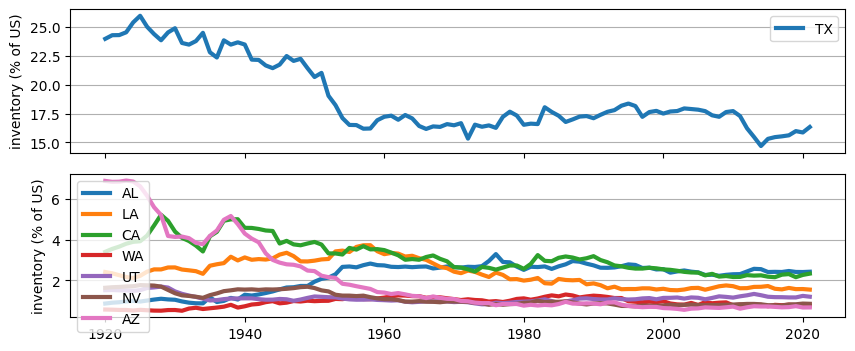

In [10]:
chosen_states = ["TX", "AL",  "LA", "CA", "WA", "UT", "NV", "AZ"]

fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True,
                        gridspec_kw={"hspace": 0.15, "wspace": 0.05})

axs[0].grid(axis="y", which="both")
axs[1].grid(axis="y", which="both")
#####################################################################################
ii=0
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "dodgerblue"
axs[0].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=1
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "red"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=2
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "k"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=3
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "c"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=4
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "c"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=5
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "c"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=6
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "c"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=7
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "c"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################


axs[1].set_ylabel('inventory (% of US)')
axs[1].legend(loc="best");

axs[0].set_ylabel('inventory (% of US)')
axs[0].legend(loc="best");


# plt.tight_layout()
plots_dir = data_dir_base + "plots/"
fig_name = plots_dir + "Tonsor_states.pdf"
plt.savefig(fname=fig_name, dpi=100, bbox_inches="tight")

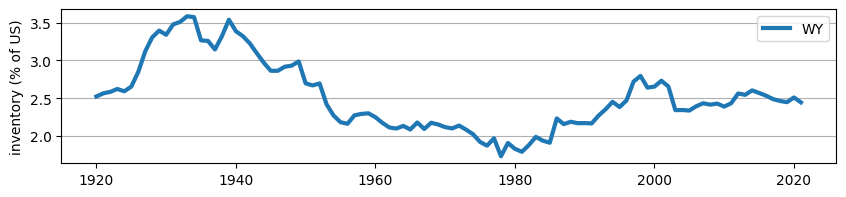

In [41]:
fig, axs = plt.subplots(1, 1, figsize=(10, 2), sharex=True, gridspec_kw={"hspace": 0.15, "wspace": 0.05})
axs.grid(axis="y", which="both")
#####################################################################################
state_ = sorted(invent_tall.state.unique())[28]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "dodgerblue"
axs.plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
axs.set_ylabel('inventory (% of US)')
axs.legend(loc="best");

# plots_dir = data_dir_base + "plots/"
# fig_name = plots_dir + "increase_states.pdf"
# plt.savefig(fname=fig_name, dpi=100, bbox_inches="tight")

In [ ]:
invent_tall = invent_tall[invent_tall.year>=1992]

chosen_states = ["TX", "AL",  "LA", "CA", "WA", "UT", "NV", "AZ"]

fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True,
                        gridspec_kw={"hspace": 0.15, "wspace": 0.05})

axs[0].grid(axis="y", which="both")
axs[1].grid(axis="y", which="both")
#####################################################################################
ii=0
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "dodgerblue"
axs[0].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=1
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "red"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=2
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "k"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=3
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "c"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=4
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "c"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=5
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "c"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=6
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "c"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################
ii=7
state_ = chosen_states[ii]
B = invent_tall[invent_tall.state==state_].copy()
color_ = "c"
axs[1].plot(B.year, B.state_perc, linewidth=3, label=state_);
#####################################################################################


axs[1].set_ylabel('inventory (% of US)')
axs[1].legend(loc="best");

axs[0].set_ylabel('inventory (% of US)')
axs[0].legend(loc="best");


# plt.tight_layout()
plots_dir = data_dir_base + "plots/"
fig_name = plots_dir + "Tonsor_states_1992.pdf"
plt.savefig(fname=fig_name, dpi=100, bbox_inches="tight")